# Projet BI :

<FONT size="6pt" color='Blue'> <center>Développement d’un système BI pour le suivi des ventes de véhicules</center></FONT>

## Traitement des Données

### Importation des bibliothèques

In [90]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from IPython.display import display, Markdown
import missingno as msno

In [91]:
# Afficher toutes les colonnes sans troncature
pd.set_option('display.max_columns', None)

# Si vous voulez aussi afficher toutes les lignes
pd.set_option('display.max_rows', None)

# Pour afficher les colonnes larges sans troncature
pd.set_option('display.width', None)

In [92]:
df = pd.read_csv('car_prices.csv')
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


- **La renommation des colonnes et leur réorganisation selon la priorité**

In [93]:
df = df.rename(columns={
    'year': 'annee_fabrication',
    'make': 'marque',
    'model': 'modele',
    'trim': 'finition',
    'body': 'carrosserie',
    'transmission': 'transmission',
    'vin': 'ID',
    'state': 'etat_vente',
    'condition': 'etat_vehicule',
    'odometer': 'kilometrage',
    'color': 'couleur_exterieure',
    'interior': 'coluleur_interieur',
    'seller': 'vendeur',
    'mmr': 'valeur_estime',
    'sellingprice': 'prix_vente',
    'saledate': 'date_vente'
})

In [94]:
df = df[['ID', 'marque', 'modele','annee_fabrication','carrosserie','etat_vehicule','kilometrage','transmission','couleur_exterieure','coluleur_interieur','finition','vendeur','valeur_estime','prix_vente','etat_vente','date_vente']]

In [95]:
df.head(2)

,ID,marque,modele,annee_fabrication,carrosserie,etat_vehicule,kilometrage,transmission,couleur_exterieure,coluleur_interieur,finition,vendeur,valeur_estime,prix_vente,etat_vente,date_vente
0,5xyktca69fg566472,Kia,Sorento,2015,SUV,5.0,16639.0,automatic,white,black,LX,kia motors america inc,20500.0,21500.0,ca,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,5xyktca69fg561319,Kia,Sorento,2015,SUV,5.0,9393.0,automatic,white,beige,LX,kia motors america inc,20800.0,21500.0,ca,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


- **La conversion des catégories en minuscules**

In [96]:
colonnes_categorielle = ['marque', 'modele','transmission', 'carrosserie', 'finition', 'couleur_exterieure', 'coluleur_interieur', 'vendeur','etat_vente']

for col in colonnes_categorielle:
    df[col] = df[col].str.lower()

In [97]:
for col in colonnes_categorielle:
    display(Markdown(f'La colonnes **{col}** contient **{df[col].nunique()}** categorie different'))

La colonnes **marque** contient **66** categorie different

La colonnes **modele** contient **851** categorie different

La colonnes **transmission** contient **3** categorie different

La colonnes **carrosserie** contient **46** categorie different

La colonnes **finition** contient **1888** categorie different

La colonnes **couleur_exterieure** contient **46** categorie different

La colonnes **coluleur_interieur** contient **17** categorie different

La colonnes **vendeur** contient **14263** categorie different

La colonnes **etat_vente** contient **64** categorie different

- **L’affichage de toutes les catégories pour chaque colonne**

In [98]:
df['marque'].value_counts().sort_index()

marque
acura             5926
airstream            1
aston martin        25
audi              5877
bentley            116
bmw              20793
buick             5121
cadillac          7629
chev truck           1
chevrolet        60587
chrysler         17485
daewoo               3
dodge            30955
dodge tk             1
dot                  1
ferrari             19
fiat               865
fisker               9
ford             93997
ford tk              1
ford truck           3
geo                 19
gmc              10638
gmc truck           11
honda            27351
hummer             805
hyundai          21836
hyundai tk           1
infiniti         15305
isuzu              204
jaguar            1420
jeep             15483
kia              18084
lamborghini          4
land rover        1864
landrover           27
lexus            11980
lincoln           5786
lotus                1
maserati           136
mazda             8508
mazda tk             1
mercedes            70
merc

In [99]:
df['modele'].value_counts().sort_index()

modele
1                                    1
1 series                           405
1500                              3280
190-class                            3
2 series                            32
200                               4049
200sx                               12
2500                               933
3                                   35
3 series                          8204
3 series gran turismo               73
300                               3907
300-class                           11
3000gt                               3
300e                                 3
300m                               101
300zx                                4
320i                                 1
323i                                 1
328i                                 1
350                                  1
3500                               255
350z                               153
360                                  1
370z                               205
4 series          

In [100]:
df['transmission'].value_counts().sort_index()

transmission
automatic    475915
manual        17544
sedan            26
Name: count, dtype: int64

- **Sedan n’est pas un type de transmission.alors on supprime tout les ligne qui contient cette valeur en type de transmission**

In [101]:
df = df[df['transmission']!= 'sedan']

In [102]:
df['carrosserie'].value_counts().sort_index()

carrosserie
access cab                    294
beetle convertible             59
cab plus                        4
cab plus 4                      6
club cab                      178
convertible                 10476
coupe                       17752
crew cab                    16394
crewmax cab                   565
cts coupe                     158
cts wagon                      14
cts-v coupe                    35
cts-v wagon                     1
double cab                   1601
e-series van                 1823
elantra coupe                 103
extended cab                 4507
g convertible                 323
g coupe                      1593
g sedan                      7417
g37 convertible                20
g37 coupe                      12
genesis coupe                 294
granturismo convertible        13
hatchback                   26237
king cab                      532
koup                          180
mega cab                      111
minivan                     25529
pr

In [103]:
df['finition'].value_counts().sort_index()

finition
!                                                   463
& coun fwd                                            1
& coun fwd limited                                    3
& coun fwd lx                                         7
& country lx                                         15
(1999.5) xe                                           7
+                                                  1622
1                                                    52
1.6                                                  29
1.6 base                                              8
1.6 s                                               306
1.6 s plus                                          542
1.6 sl                                              119
1.6 sv                                             1385
1.8                                                 129
1.8 base                                             47
1.8 krom                                              8
1.8 s                                  

In [104]:
df['couleur_exterieure'].value_counts().sort_index()

couleur_exterieure
beige          9222
black        110970
blue          51139
brown          6717
burgundy       8972
charcoal        479
gold          11342
gray          82857
green         11382
lime             15
off-white      1449
orange         2078
pink             42
purple         1561
red           43569
silver        83389
turquoise       236
white        106673
yellow         1285
—             24685
Name: count, dtype: int64

In [105]:
df['couleur_exterieure'].value_counts().sort_index()

couleur_exterieure
beige          9222
black        110970
blue          51139
brown          6717
burgundy       8972
charcoal        479
gold          11342
gray          82857
green         11382
lime             15
off-white      1449
orange         2078
pink             42
purple         1561
red           43569
silver        83389
turquoise       236
white        106673
yellow         1285
—             24685
Name: count, dtype: int64

In [106]:
df['vendeur'].value_counts().sort_index()

vendeur
1 cochran of monroeville                                252
1 for all auto sales                                      1
101motors                                                 1
1360250 alberta ltd                                       1
1360250 alberta ltd.                                      1
138 auto inc                                              1
1428879 alberta ltd                                       1
143 auto sales inc                                        8
1479582 alberta ltd.                                      6
1491081 alberta inc.                                      4
1555357 alberta limited                                   1
1582529 alberta ltd                                       1
159191 canada inc                                       134
1764175 alberta ltd                                       1
1770144 alberta ltd                                       1
1813477 alberta ltd                                       3
1814099 alberta ltd             

- **Traitement des valeur null**

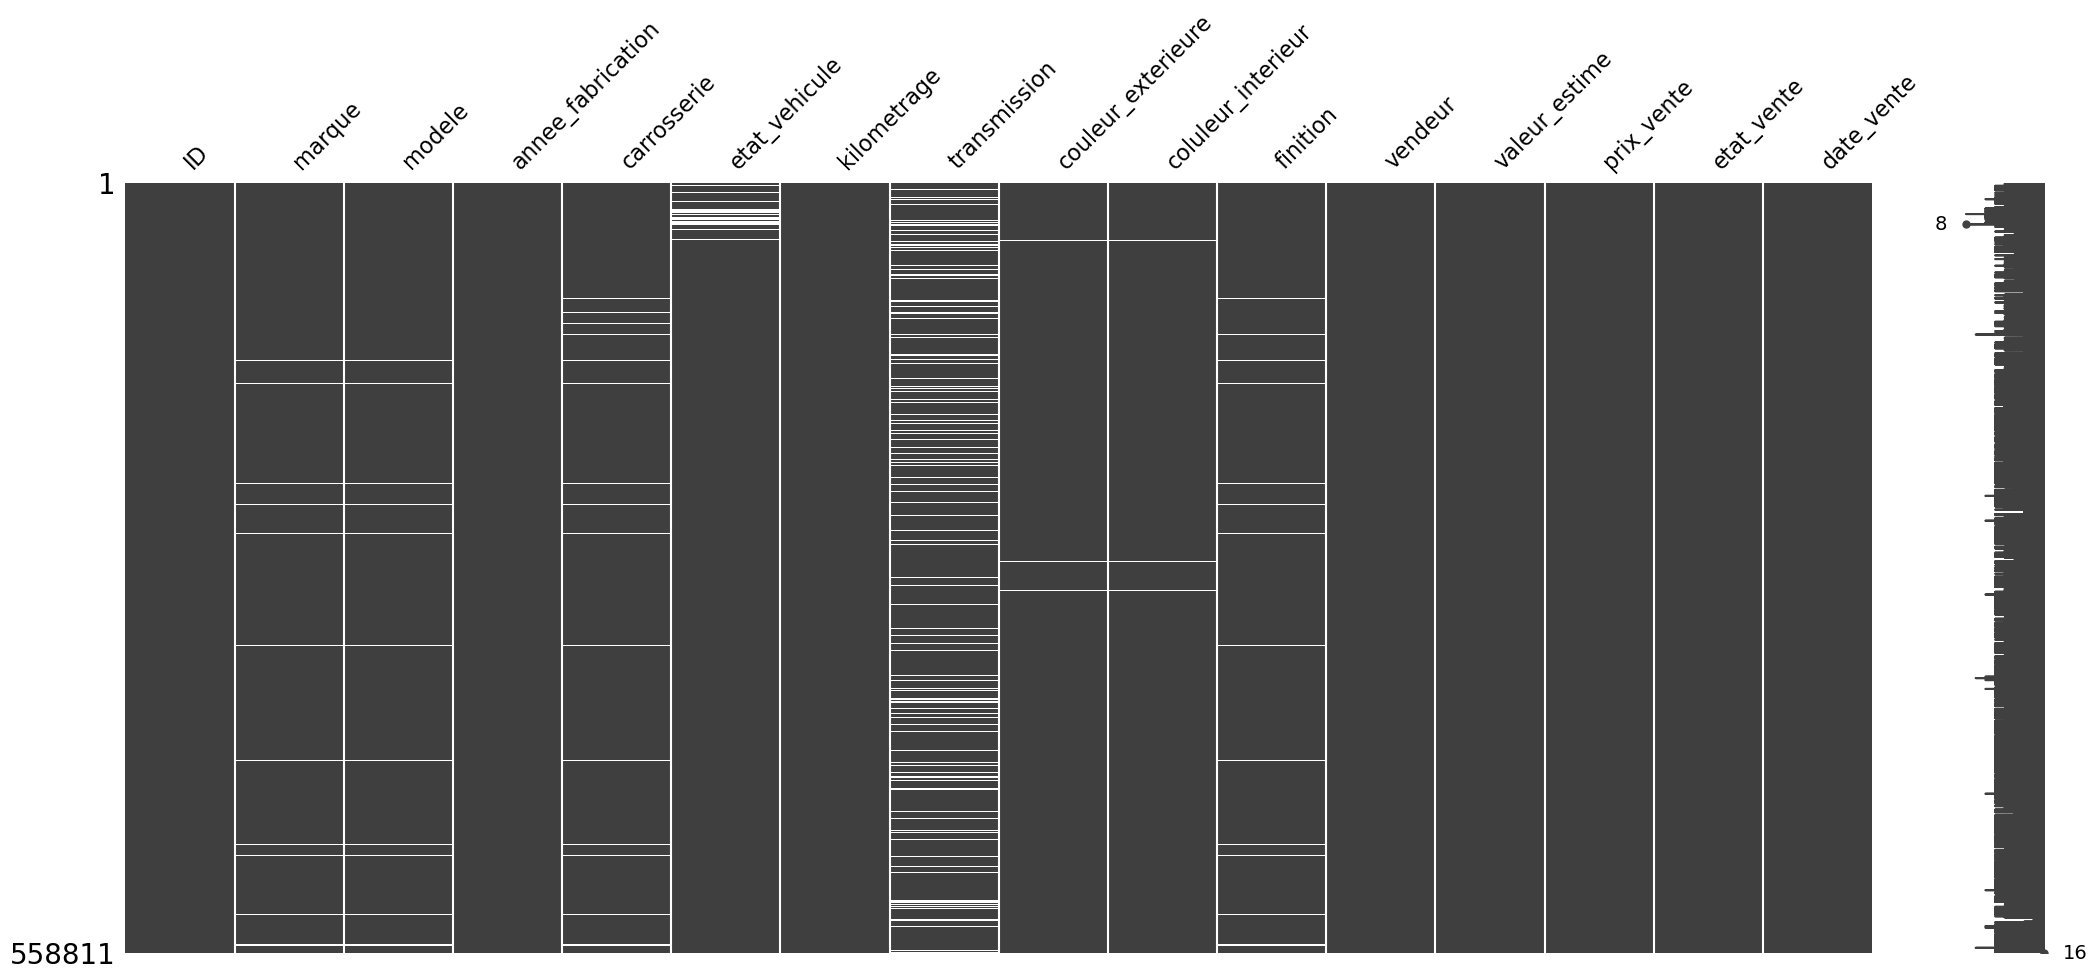

In [107]:
msno.matrix(df)
plt.show()

In [108]:
df.isna().sum()

ID                        0
marque                10301
modele                10399
annee_fabrication         0
carrosserie           13195
etat_vehicule         11794
kilometrage              94
transmission          65352
couleur_exterieure      749
coluleur_interieur      749
finition              10651
vendeur                   0
valeur_estime            12
prix_vente               12
etat_vente                0
date_vente               12
dtype: int64

- **La Suppression des lignes qui contients des valeur vide un espace par exemple espaces et des valeur nan**

In [109]:
import pandas as pd

def supprimer_lignes_vides(df):
    # Supprimer les lignes avec NaN
    df_clean = df.dropna()

    # Supprimer les lignes avec des chaînes vides ou juste des espaces
    df_clean = df_clean[~df_clean.apply(lambda row: row.astype(str).str.strip().eq('').any(), axis=1)]
    df['date_vente'] = df['date_vente'].astype(str).str.strip()
    return df_clean


In [110]:
df=supprimer_lignes_vides(df)

- **RQ : la colone de date_vente contient des espace comme un valeur non nul**

In [111]:
def remplacer_espaces_par_nan_et_supprimer(dataframe, nom_colonne):
    """
    Remplace les espaces vides dans une colonne par NaN et les supprime.
    
    Args:
        dataframe (pandas.DataFrame): Le DataFrame à modifier
        nom_colonne (str): Le nom de la colonne à traiter
        
    Returns:
        pandas.DataFrame: Le DataFrame avec les valeurs NaN supprimées
    """
    # Vérifier si la colonne existe
    if nom_colonne not in dataframe.columns:
        raise ValueError(f"La colonne '{nom_colonne}' n'existe pas dans le DataFrame")
    
    # Créer une copie pour éviter de modifier l'original
    df_copy = dataframe.copy()
    
    # Remplacer les cellules contenant uniquement des espaces par NaN
    df_copy[nom_colonne] = df_copy[nom_colonne].replace(r'^\s*$', np.nan, regex=True)
    
    # Supprimer les lignes contenant NaN dans cette colonne
    df_clean = df_copy.dropna(subset=[nom_colonne])
    
    return df_clean

In [112]:
df = remplacer_espaces_par_nan_et_supprimer(df, 'date_vente')

In [113]:
display(Markdown(f'la dimension de la table apres la la suppresion des nan est :**{df.shape}**'))

la dimension de la table apres la la suppresion des nan est :**(472325, 16)**

- **Traitement de la colonne date  et affichier les dates selon la forme DD/MM/YYYY**

In [116]:
df['date_vente'] = pd.to_datetime(df['date_vente'], errors='coerce')

In [117]:
df['date_vente'] = df['date_vente'].dt.strftime('%d/%m/%Y')

In [118]:
df['date_vente'].head()

0    16/12/2014
1    16/12/2014
2    15/01/2015
3    29/01/2015
4    18/12/2014
Name: date_vente, dtype: object

In [119]:
df.to_csv("data_BI_clean.csv", index=False, encoding='utf-8')

<FONT size='5pt'><center>on touches exactement à un problème classique en data science : comment traiter des colonnes catégorielles à cardinalité très élevée comme ces colonnes (seller) avec des centaines ou milliers de valeurs différentes<center><Font>

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate

# Dictionnaire des colonnes catégorielles avec le nombre de catégories uniques
categorical_features = {
    'marque': df['marque'].nunique(),
    'modele': df['modele'].nunique(),
    'transmission': 5,
    'carrosserie': 10,
    'finition': 20,
    'couleur_exterieure': 15,
    'couleur_interieure': 15,
    'vendeur': 10,
    'etat_vente': 4
}

embedding_dim = 25  # dimension fixe, tu peux aussi l’adapter par feature si besoin

# Stocker tous les inputs et embeddings
inputs = []
embeddings = []

for feature_name, n_categories in categorical_features.items():
    input_layer = Input(shape=(1,), name=f'{feature_name}_input')
    embedding_layer = Embedding(input_dim=n_categories, output_dim=embedding_dim, name=f'{feature_name}_embedding')(input_layer)
    flatten_layer = Flatten()(embedding_layer)
    
    inputs.append(input_layer)
    embeddings.append(flatten_layer)

# Concaténer tous les vecteurs d'embedding
concatenated = Concatenate(name='concatenated_embeddings')(embeddings)

# Créer le modèle final
model = Model(inputs=inputs, outputs=concatenated)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ marque_input        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ modele_input        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transmission_input  │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ carrosserie_input   │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ finition_input      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ couleur_exterieure… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ couleur_interieure… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vendeur_input       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ etat_vente_input    │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ marque_embedding    │ (None, 1, 25)     │      1,325 │ marque_input[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ modele_embedding    │ (None, 1, 25)     │     19,100 │ modele_input[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transmission_embed… │ (None, 1, 25)     │        125 │ transmission_inp… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ carrosserie_embedd… │ (None, 1, 25)     │        250 │ carrosserie_inpu… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ finition_embedding  │ (None, 1, 25)     │        500 │ finition_input[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ couleur_exterieure… │ (None, 1, 25)     │        375 │ couleur_exterieu… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ couleur_interieure… │ (None, 1, 25)     │        375 │ couleur_interieu… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vendeur_embedding   │ (None, 1, 25)     │        250 │ vendeur_input[0]

 Total params: 22,400 (87.50 KB)

 Trainable params: 22,400 (87.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from adjustText import adjust_text

def plot_embeddings(model, feature_name, n_categories, labels, embedding_dim=25):
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt

    layer_name = f"{feature_name}_embedding"
    embedding_weights = model.get_layer(layer_name).get_weights()[0]
    
    # PCA
    pca = PCA(n_components=2)
    embedding_2d = pca.fit_transform(embedding_weights)
    
    # Affichage
    plt.figure(figsize=(12, 8))
    plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c='skyblue', s=100, edgecolors='k')
    
    texts = []
    for i in range(n_categories):
        texts.append(
            plt.text(embedding_2d[i, 0], embedding_2d[i, 1], labels[i], fontsize=8)
        )
    
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))
    
    plt.title(f"PCA des embeddings : {feature_name}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


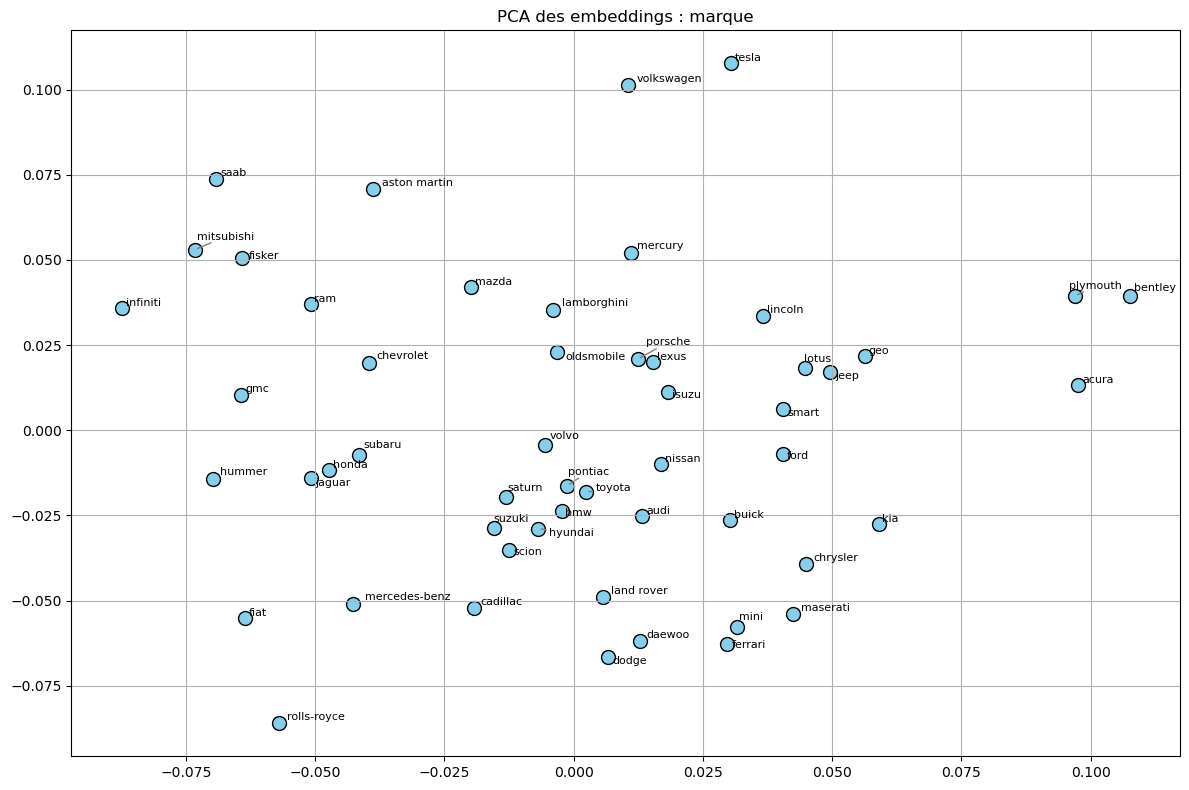

In [ ]:
labels = df['marque'].unique().tolist()  # récupère les vraies marques
plot_embeddings(model, feature_name='marque', n_categories=len(labels), labels=labels)

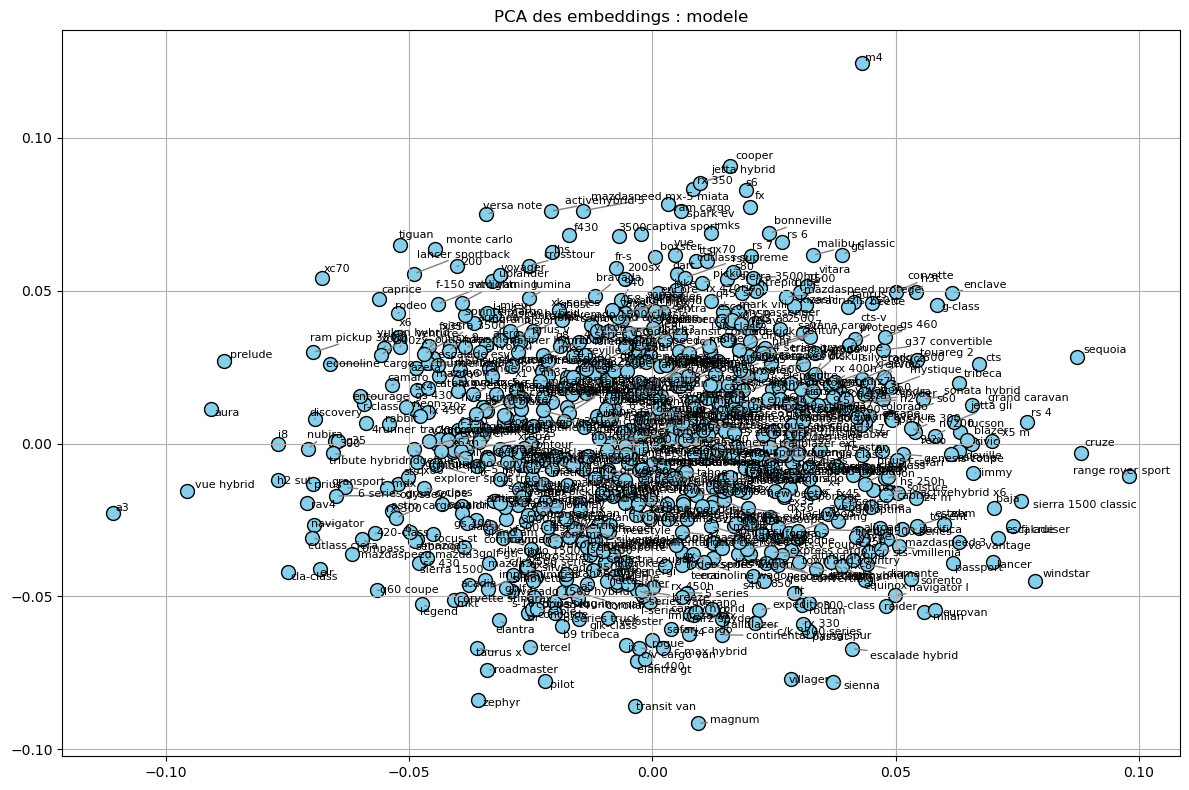

In [ ]:
labels = df['modele'].unique().tolist()  # récupère les vraies marques
plot_embeddings(model, feature_name='modele', n_categories=len(labels), labels=labels)